In [10]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score

In [11]:
data_raw=pd.read_csv("./data/Train.csv")
meta=pd.read_csv("./data/airqo_metadata.csv")

In [12]:
from files.preprocessing import *

In [13]:
data = preprocessing(data_raw, use_location=False, only_means=True)

/Users/denniseickhorn/neuefische/ML-Project-1/files/preprocessing.py:48: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(features,1,inplace=True)


In [14]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
print(mean_squared_error(y_test, y_pred_reg, squared=False))
y_pred_reg_train = reg.predict(X_train)
print(mean_squared_error(y_train, y_pred_reg_train, squared=False))

42.7874293711876
40.83035041804571


Text(0.5, 0, 'datapoint')

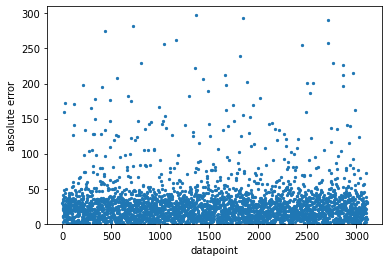

In [25]:
plt.scatter(range(len(y_test)),np.abs(y_test-y_pred_reg), s=5.0)
plt.ylim([0,310])
plt.ylabel('absolute error')
plt.xlabel('datapoint')